In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import yfinance as yf

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score , mean_squared_error

In [2]:
data = yf.download("BTC-USD",start="2000-1-1",end="2022-7-1",auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [3]:
data.describe()

,Open,High,Low,Close,Volume
count,2844.000000,2844.000000,2844.000000,2844.000000,2.844000e+03
mean,12417.091835,12740.147621,12053.700606,12422.233886,1.540798e+10
std,16599.725375,17028.421279,16101.873540,16595.044603,1.993426e+10
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06
25%,630.784515,641.147736,621.927261,632.335251,8.610942e+07
50%,6548.199951,6643.439941,6449.304932,6547.295166,5.782325e+09
75%,11487.965820,11791.881592,11225.209473,11489.900146,2.625181e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11


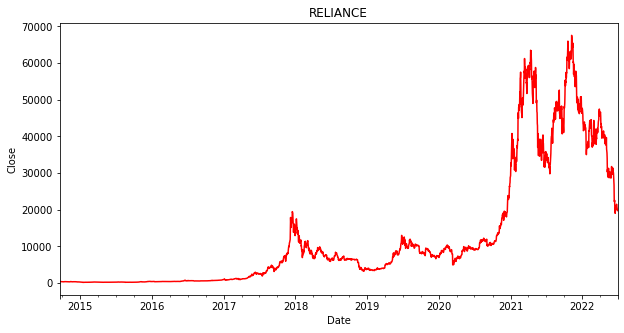

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

data.Close.plot(figsize=(10,5),color="red")
plt.title("RELIANCE")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

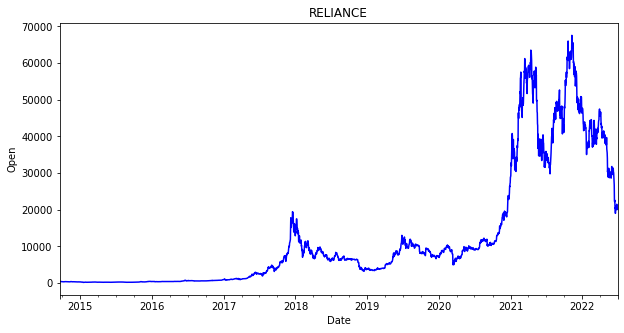

In [5]:
data.Open.plot(figsize=(10,5),color="blue")
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("RELIANCE")
plt.show()

In [6]:
# sns.pairplot(data)

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

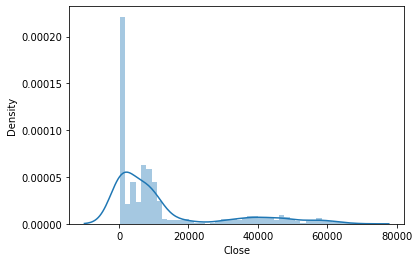

In [7]:
sns.distplot(data["Close"])

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

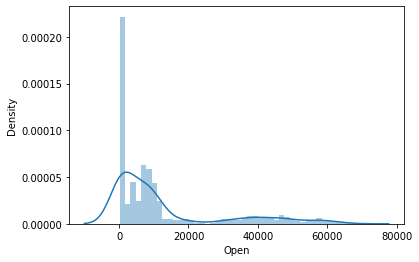

In [8]:
sns.distplot(data["Open"])

In [9]:
x = data.drop('Close',axis=1)
y = data['Close']

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=False)

In [29]:
x_test

,Open,High,Low,Volume
Date,,,,
2020-12-09,18320.884766,18626.292969,17935.546875,34420373071
2020-12-10,18553.298828,18553.298828,17957.064453,25547132265
2020-12-11,18263.929688,18268.453125,17619.533203,27919640985
2020-12-12,18051.320312,18919.550781,18046.041016,21752580802
2020-12-13,18806.765625,19381.535156,18734.332031,25450468637
...,...,...,...,...
2022-06-26,21496.494141,21783.724609,21016.269531,18027170497
2022-06-27,21028.238281,21478.089844,20620.199219,20965695707
2022-06-28,20731.544922,21164.423828,20228.812500,21381535161


In [12]:
def crossValidation(model):
    score = cross_val_score(model,x_test,y_test,cv=10,scoring="neg_mean_squared_error")
    rmse = np.sqrt(-score)
    return rmse

In [13]:
def calculate_Metrics(model):
    predict = model.predict(x_test)
    mse = mean_squared_error(y_test,predict)
    rmse = np.sqrt(mse)
    
    r2Score = r2_score(y_test , predict)
    
    return rmse , r2Score

In [14]:
rmse_dict = {}
r2sc_dict = {}
crossVal_dict = {}

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_model = LinearRegression().fit(x_train,y_train)

In [17]:
Rmse , R2_score = calculate_Metrics(lr_model)

In [18]:
print("Cross Validation Score : ",np.mean(crossValidation(lr_model)))
print(f"RMSE : {Rmse}\nR2_Score : {R2_score}")

rmse_dict['Linear Regression'] = Rmse
r2sc_dict['Linear Regression'] = R2_score
crossVal_dict['Linear Regression'] = np.mean(crossValidation(lr_model))

Cross Validation Score :  709.2213865826768
RMSE : 727.9495660222123
R2_Score : 0.9955758401747422


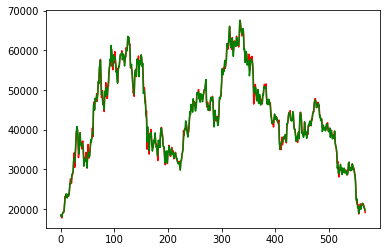

In [19]:
predictedPrice = lr_model.predict(x_test)
plt.plot(predictedPrice,color = 'red')
plt.plot(list(y_test),color='green')
plt.show()

In [20]:
from sklearn.linear_model import Ridge

ri_model = Ridge().fit(x_train,y_train)

In [21]:
Rmse , R2_score = calculate_Metrics(ri_model)
print("Cross Validation Score : ",np.mean(crossValidation(ri_model)))
print(f"RMSE : {Rmse}\nR2_Score : {R2_score}")

rmse_dict['Ridge Regression'] = Rmse
r2sc_dict['Ridge Regression'] = R2_score
crossVal_dict['Ridge Regression'] = np.mean(crossValidation(ri_model))

Cross Validation Score :  709.2213865842693
RMSE : 727.94956605121
R2_Score : 0.9955758401743897


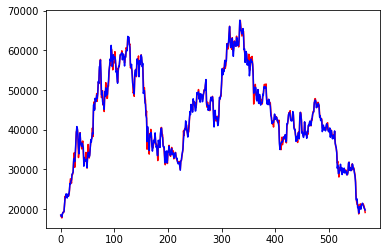

In [22]:
predictedPrice = ri_model.predict(x_test)
plt.plot(predictedPrice,color = 'red',label = 'Predicted Price')
plt.plot(list(y_test),color='blue' , label = 'True Price')
plt.show()

In [23]:
y_test

Date
2020-12-09    18553.916016
2020-12-10    18264.992188
2020-12-11    18058.904297
2020-12-12    18803.656250
2020-12-13    19142.382812
                  ...     
2022-06-26    21027.294922
2022-06-27    20735.478516
2022-06-28    20280.634766
2022-06-29    20104.023438
2022-06-30    19784.726562
Name: Close, Length: 569, dtype: float64

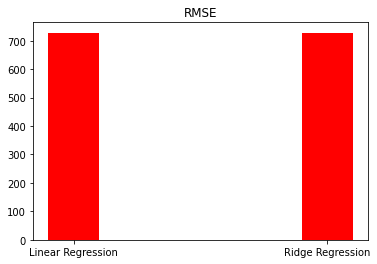

In [24]:
value = list(rmse_dict.values())
keys = list(rmse_dict.keys())

plt.bar(keys , value , color = 'red', width = 0.2 , align = 'center')
plt.title('RMSE')
plt.show()

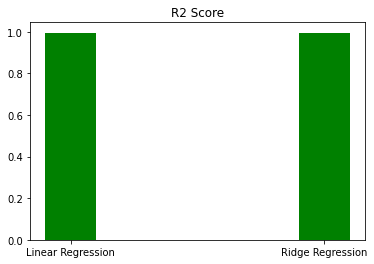

In [25]:
value = list(r2sc_dict.values())
keys = list(r2sc_dict.keys())

plt.bar(keys , value , color = 'green', width = 0.2 , align = 'center')
plt.title('R2 Score')
plt.show()

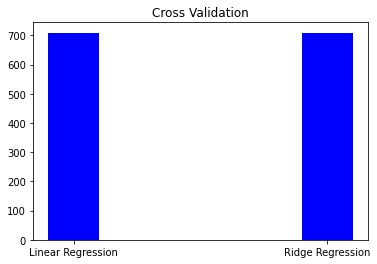

In [26]:
value = list(crossVal_dict.values())
keys = list(crossVal_dict.keys())

plt.bar(keys , value , color = 'blue', width = 0.2 , align = 'center')
plt.title('Cross Validation')
plt.show()